In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [5]:
data=pd.read_csv('/content/drive/MyDrive/FINAL YEAR PROJECT 2023/Dataset/TexasTurbine.csv')

In [ ]:
data

,Time stamp,System power generated | (kW),Wind speed | (m/s),Wind direction | (deg),Pressure | (atm),Air temperature | ('C)
0,"Jan 1, 12:00 am",1766.64,9.926,128,1.000480,18.263
1,"Jan 1, 01:00 am",1433.83,9.273,135,0.999790,18.363
2,"Jan 1, 02:00 am",1167.23,8.660,142,0.999592,18.663
3,"Jan 1, 03:00 am",1524.59,9.461,148,0.998309,18.763
4,"Jan 1, 04:00 am",1384.28,9.184,150,0.998507,18.963
...,...,...,...,...,...,...
8755,"Dec 31, 07:00 pm",1234.70,8.848,129,0.998604,19.663
8756,"Dec 31, 08:00 pm",1105.37,8.502,118,1.000090,19.063
8757,"Dec 31, 09:00 pm",1405.71,9.224,117,0.998408,18.463
8758,"Dec 31, 10:00 pm",1221.36,8.799,116,0.998013,18.063


In [6]:
del data['Time stamp']

In [7]:
data

,System power generated | (kW),Wind speed | (m/s),Wind direction | (deg),Pressure | (atm),Air temperature | ('C)
0,1766.64,9.926,128,1.000480,18.263
1,1433.83,9.273,135,0.999790,18.363
2,1167.23,8.660,142,0.999592,18.663
3,1524.59,9.461,148,0.998309,18.763
4,1384.28,9.184,150,0.998507,18.963
...,...,...,...,...,...
8755,1234.70,8.848,129,0.998604,19.663
8756,1105.37,8.502,118,1.000090,19.063
8757,1405.71,9.224,117,0.998408,18.463
8758,1221.36,8.799,116,0.998013,18.063


In [8]:
df=data.dropna()

In [9]:
df

,System power generated | (kW),Wind speed | (m/s),Wind direction | (deg),Pressure | (atm),Air temperature | ('C)
0,1766.64,9.926,128,1.000480,18.263
1,1433.83,9.273,135,0.999790,18.363
2,1167.23,8.660,142,0.999592,18.663
3,1524.59,9.461,148,0.998309,18.763
4,1384.28,9.184,150,0.998507,18.963
...,...,...,...,...,...
8755,1234.70,8.848,129,0.998604,19.663
8756,1105.37,8.502,118,1.000090,19.063
8757,1405.71,9.224,117,0.998408,18.463
8758,1221.36,8.799,116,0.998013,18.063


In [10]:
df=df.rename({'System power generated | (kW)':'System_power_generated','Wind speed | (m/s)':'Wind_speed',
              'Wind direction | (deg)':'Wind_direction','Pressure | (atm)':'Pressure',
              "Air temperature | ('C)":'Air_temperature'},axis=1)

In [11]:
df.columns

Index(['System_power_generated', 'Wind_speed', 'Wind_direction', 'Pressure',
       'Air_temperature'],
      dtype='object')

In [12]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, explained_variance_score,median_absolute_error

In [13]:
from sklearn.model_selection import train_test_split
X = df.drop(['System_power_generated'], axis=1).values
y = df['System_power_generated'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

In [14]:
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

In [15]:
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
# Define CNN model
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(1))

# Compile model
model.compile(optimizer='adam', loss='mse')

# Train model
history = model.fit(X_train, y_train, epochs=50, batch_size=64, validation_data=(X_test, y_test))

# Evaluate model
loss = model.evaluate(X_test, y_test, verbose=0)
print("Test Loss: {:.3f}".format(loss))

Epoch 1/50
110/110 [==============================] - 1s 4ms/step - loss: 1210545.0000 - val_loss: 938973.7500
Epoch 2/50
110/110 [==============================] - 0s 3ms/step - loss: 975898.8125 - val_loss: 869266.1250
Epoch 3/50
110/110 [==============================] - 0s 2ms/step - loss: 899392.0625 - val_loss: 804861.4375
Epoch 4/50
110/110 [==============================] - 0s 3ms/step - loss: 831272.2500 - val_loss: 766057.4375
Epoch 5/50
110/110 [==============================] - 0s 3ms/step - loss: 799608.3125 - val_loss: 752037.7500
Epoch 6/50
110/110 [==============================] - 0s 3ms/step - loss: 793011.4375 - val_loss: 750374.1250
Epoch 7/50
110/110 [==============================] - 0s 3ms/step - loss: 787082.0625 - val_loss: 745755.8125
Epoch 8/50
110/110 [==============================] - 0s 2ms/step - loss: 781290.2500 - val_loss: 743263.9375
Epoch 9/50
110/110 [==============================] - 0s 2ms/step - loss: 772096.1250 - val_loss: 730140.3750
Epoch 10/

In [16]:
import pandas as pd

<Axes: title={'center': 'Loss vs Val Loss'}>

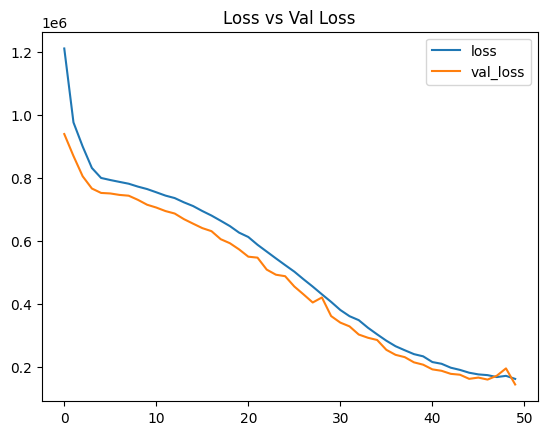

In [19]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot(title="Loss vs Val Loss")